In [8]:
import os
os.chdir('..')
print(os.getcwd())

/workspace/MLV_IR_OD


In [88]:
from PIL import Image, ImageDraw
import json

result_file_path = "0910_1result.txt"


# Load the result file (assuming it's in JSON format)
with open(result_file_path, 'r') as f:
    result_data = json.load(f)

key = 3
bbox = result_data[key]['bbox']

print(result_data[key])

def visualize(image_id, bbox_list):
    image_dir = "datasets/hscai/images/test_open"
    image_path = os.path.join(image_dir, image_id)
    image_path += '.png'

    # Load the image
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        # Creating a placeholder image if the actual image is not available
        image = Image.new("RGB", (500, 500), (255, 255, 255))  # Example image if not found


    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    for bbox in bbox_list:

        # Extracting bbox values (x_left, y_top, width, height)
        x_left, y_top, w, h = bbox

        # Calculating bottom-right corner
        x_right = x_left + w
        y_bottom = y_top + h

        # Draw the bounding box
        draw.rectangle([x_left, y_top, x_right, y_bottom], outline="red", width=2)

    # Save or display the image
    image.show()  # To display the image
    image.save("output_image_with_bbox.jpg")  # To save the image with the bounding box



{'image_id': 'test_open_100', 'category_id': 1, 'bbox': [393.83233642578125, 208.18994140625, 15.9783935546875, 14.15118408203125], 'score': 0.5895785689353943}


In [21]:

# submit format: {"image_id": "val_0", "category_id": 5, "bbox": [359.361, 207.394, 22.972, 43.519], "score": 0.01585}, 
def convert_to_submit(result_dict_list, bbox_obj, image_id):

    for idx in range(len(bbox_obj.cls)):
        result_dict = {}
        result_dict["image_id"] = image_id
        result_dict["category_id"] = int(bbox_obj.cls[idx].detach().item())
        result_dict["bbox"] = bbox_obj.xyxy[idx].detach().tolist()[:2] + bbox_obj.xywh[idx].detach().tolist()[2:]
        result_dict["score"] = bbox_obj.conf[idx].detach().item()
        result_dict_list.append(result_dict)


image 1/1 /workspace/MLV_IR_OD/datasets/hscai/images/test_open/test_open_1630.png: 480x640 7 persons, 1 car, 1 bike, 1 dog​, 29.0ms
Speed: 1.2ms preprocess, 29.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'car', 2: 'truck', 3: 'bus', 4: 'bicyle', 5: 'bike', 6: 'extra_vehicle', 7: 'dog\u200b'}
obb: None
orig_img: array([[[203, 203, 203],
        [190, 190, 190],
        [183, 183, 183],
        ...,
        [170, 170, 170],
        [149, 149, 149],
        [153, 153, 153]],

       [[200, 200, 200],
        [205, 205, 205],
        [173, 173, 173],
        ...,
        [173, 173, 173],
        [157, 157, 157],
        [153, 153, 153]],

       [[200, 200, 200],
        [190, 190, 190],
        [197, 197, 197],
        ...,
        [181, 181, 181],
        [153, 153, 153],
        [157, 157, 157]],

      

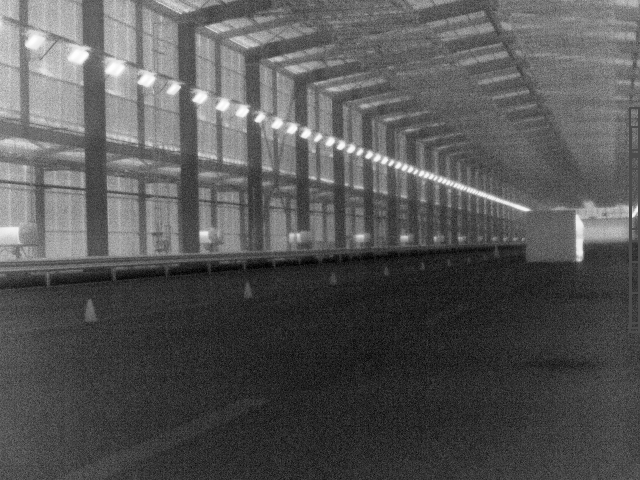

In [94]:
from ultralytics import YOLOv10

img_id = 'test_open_1630'
img_path = 'datasets/hscai/images/test_open/' + img_id + '.png'
model = YOLOv10('runs/detect/train8/weights/last.pt')
result = model.predict(img_path, conf=0.0001)

print(result)

bullshit_list = []
convert_to_submit(bullshit_list, bbox_obj=result[0].boxes, image_id=img_id)
print(bullshit_list)

num =1
bbox_list = [item['bbox'] for item in bullshit_list]
print(bbox_list)

visualize(img_id, bbox_list)
#visualize(img_id, None)